In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pylab as plt

#import skfuzzy as fuzz

from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.common import Membership as mf
from pyFTS.benchmarks import benchmarks as bchmk

%matplotlib inline

In [2]:
dataset = pd.read_excel('Rice_Price_Inflation.xlsx')

In [3]:
dataset.head()

,DATE,PRICE,INFLATION,FOOD INFLATION,SECURITY INDEX
0,2012-05-15,14974.95,12.7,12.9,4.5
1,2012-06-15,14700.00,12.9,12.0,4.5
2,2012-07-15,16075.00,12.8,12.1,4.5
3,2012-08-15,16960.00,11.7,11.1,4.5
4,2012-09-15,15600.00,11.3,10.2,4.5


In [4]:
dataset.tail()

,DATE,PRICE,INFLATION,FOOD INFLATION,SECURITY INDEX
104,2021-06-15,26500.00,17.75,21.83,8.8
105,2021-07-15,26274.19,17.38,21.03,8.8
106,2021-08-15,26500.00,17.01,20.30,8.8
107,2021-09-15,26785.71,16.63,19.57,8.8
108,2021-10-15,26300.00,15.99,18.34,8.8


In [3]:
ind = np.argsort(dataset['PRICE'])

In [4]:
sorted_data = dataset['PRICE'][ind]
sorted_data.head()

10    14000.0
6     14000.0
5     14360.0
7     14375.0
9     14525.0
Name: PRICE, dtype: float64

In [5]:
sorted_data.tail()

49    30700.0
58    31425.0
89    32750.0
90    34750.0
91    37000.0
Name: PRICE, dtype: float64

In [3]:
dataset.index = pd.to_datetime(dataset['DATE'])
dataset.drop(columns='DATE',inplace=True)
dataset.head()

,PRICE,INFLATION,FOOD INFLATION,SECURITY INDEX
DATE,,,,
2012-05-15,14974.95,12.7,12.9,4.5
2012-06-15,14700.00,12.9,12.0,4.5
2012-07-15,16075.00,12.8,12.1,4.5
2012-08-15,16960.00,11.7,11.1,4.5
2012-09-15,15600.00,11.3,10.2,4.5


In [11]:
train = dataset.iloc[:87]
test = dataset.iloc[87:]

In [13]:
import os
%run multivariate_class.ipynb

In [8]:
from pyFTS.partitioners import Grid, Util as pUtil
from pyFTS.common import Transformations

from pyFTS.models.seasonal import partitioner as seasonal
from pyFTS.models.seasonal.common import DateTime

bc = Transformations.BoxCox(0)
diff = Transformations.Differential(1)

In [1]:
data = [13055, 13563, 13867, 14696]

In [3]:
np.sum(data)

55181

In [3]:
def distances_list(data):

    list_distance = np.array()
    for i in range(len(data)-1):
        distance = np.abs(data[i] - data[i+1])
        list_distance = np.append(list_distance, distance)

    return list_distance

In [3]:
# This function computes the distances between data points and return,
# their total average distance and a list of the distances


def average_distance(data, n):

    distance = [np.abs(data[i] - data[i+1]) for i in range(len(data) -1)]
    
    return (np.sum(distance)/(n), distance)



In [4]:
AVr, dist = average_distance(data, len(data)-1)
AVr, dist

(547.0, [508, 304, 829])

In [5]:
# the sum of the differences between two consecutive values are used to,
# calculate the standard deviation of the data.

def standard_deviation(data):
    AVr, dist = average_distance(data, len(data)-1)
    std = np.sum([np.power(i - AVr, 2) for i in dist])

    return np.sqrt(std/(len(data)-1))
    



In [7]:
std = standard_deviation(data)
std

216.0972003520638

In [ ]:
std

In [20]:
 def revised_distance():
    #_, dist = average_distance(data, len(data)-1)
    max_val = AVr + std  # outlier is a value less than or larger than one,
    min_val = AVr - std   # standard deviation from Average distance.

    dist_copy = dist.copy()

    for val in dist_copy:
        if (val < min_val)  | (val > max_val):
                dist_copy = np.delete(dist_copy, np.where (dist_copy==val))
    return dist_copy


In [21]:
revDist = revised_distance()
revDist

array([508])

In [56]:

#def revised_distance_list(data):
#    rev_dist = np.zeros(0)
#    for i in range(len(data) - 1):
#        dist = (np.abs(data[i] - data[i+1]))
#        rev_dist = np.append(rev_dist, dist)
    #print(dist_data)

#    max_dist = average_distance(data, len(data)) + standard_deviation(data, len(data))
#    min_dist = average_distance(data, len(data)) - standard_deviation(data, len(data))

#    for val in rev_dist:
#        if (val < min_dist)  | (val > max_dist):
#            rev_dist = np.delete(rev_dist, np.where (rev_dist==val))

#    return rev_dist


In [22]:
def range_limits(data):
    upper_limit = max(data) + revDist
    lower_limit = min(data) - revDist

    data_range = upper_limit - lower_limit
    return data_range


In [23]:
def new_data():
    data.append(upper_limit)
    data.append(lower_limit)
    sorted_data = np.argsort(data)

    return sorted_data

In [26]:
def set_number(data):
    sorted_data = new_data()
    data_range = range_limits(sorted_data)
    #Adr = revised_distance(data)
    return np.rint(((data_range - revDist)/(2 * revDist)))

In [27]:
numbers = set_number(data)
numbers

NameError: name 'upper_limit' is not defined

In [ ]:
from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.common import Membership as mf

In [5]:
from pyFTS.common import Transformations

tdiff = Transformations.Differential(1)

In [18]:
partitioner = Entropy.EntropyPartitioner(data=sorted_data, npart=15)
partitioner_diff = Entropy.EntropyPartitioner(data=sorted_data, npart=5, transformation=tdiff)

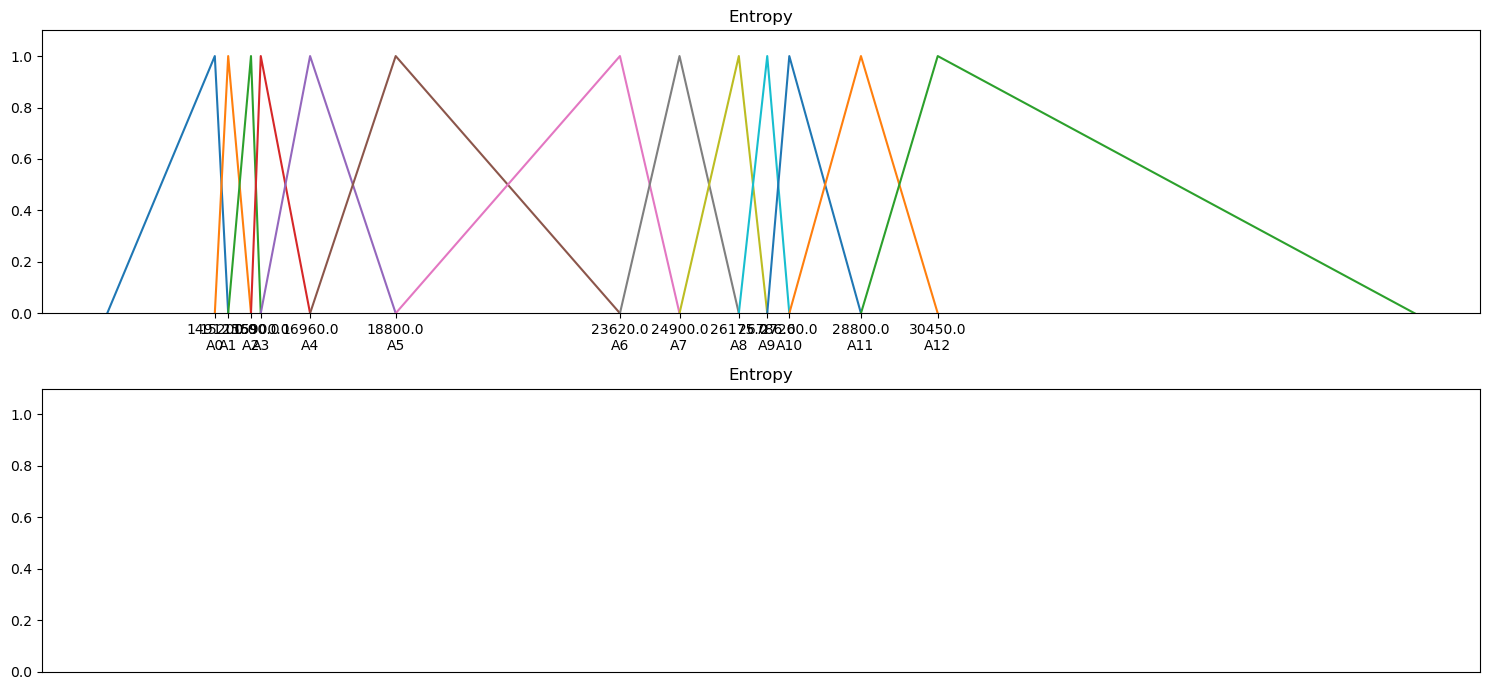

In [24]:
pUtil.plot_partitioners(sorted_data, [partitioner,partitioner_diff], tam=[15,7])

In [8]:
for p in fuzzy_set:
    print(p)

Entropy - trimf:
A0: trimf([12600.0, 14912.5, 15200.0])
A1: trimf([14912.5, 15200.0, 15690.0])
A2: trimf([15200.0, 15690.0, 15900.0])
A3: trimf([15690.0, 15900.0, 16960.0])
A4: trimf([15900.0, 16960.0, 18800.0])
A5: trimf([16960.0, 18800.0, 23620.0])
A6: trimf([18800.0, 23620.0, 24900.0])
A7: trimf([23620.0, 24900.0, 25700.0])
A8: trimf([24900.0, 25700.0, 26175.0])
A9: trimf([25700.0, 26175.0, 26350.0])
A10: trimf([26175.0, 26350.0, 26785.71])
A11: trimf([26350.0, 26785.71, 27260.0])
A12: trimf([26785.71, 27260.0, 28800.0])
A13: trimf([27260.0, 28800.0, 30450.0])
A14: trimf([28800.0, 30450.0, 40700.0])

Entropy - trapmf:
A0: trapmf([12600.0, 13756.25, 15056.25, 15200.0])
A1: trapmf([14912.5, 15056.25, 15445.0, 15690.0])
A2: trapmf([15200.0, 15445.0, 15795.0, 15900.0])
A3: trapmf([15690.0, 15795.0, 16430.0, 16960.0])
A4: trapmf([15900.0, 16430.0, 17880.0, 18800.0])
A5: trapmf([16960.0, 17880.0, 21210.0, 23620.0])
A6: trapmf([18800.0, 21210.0, 24260.0, 24900.0])
A7: trapmf([23620.0, 2426

In [25]:
from pyFTS.common import fts,tree
from pyFTS.models import hofts, pwfts

rice_price = pwfts.ProbabilisticWeightedFTS("1", partitioner=partitioner)
rice_price.fit(sorted_data, save_model=True, file_path='pwfts')
rice_price.shortname = "1st Order"
print(rice_price)

TypeError: __init__() takes 1 positional argument but 2 were given

In [28]:
dataset = sorted_data

train_split = 89
test_split = 20

In [29]:
from pyFTS.partitioners import Grid, Util as pUtil
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.models import chen

tag = 'chen_partitioning'
_type = 'point'

In [30]:
from pyFTS.common import Transformations

tdiff = Transformations.Differential(1)

boxcox = Transformations.BoxCox(0)

In [31]:
bchmk.sliding_window_benchmarks(fuzzy_set, 12, train=0.8, inc=0.2,
                                    methods=[chen.ConventionalFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    partitions=np.arange(10,100,2), 
                                    progress=False, type=_type,
                                    file="benchmarks.db", dataset=dataset, tag=tag)

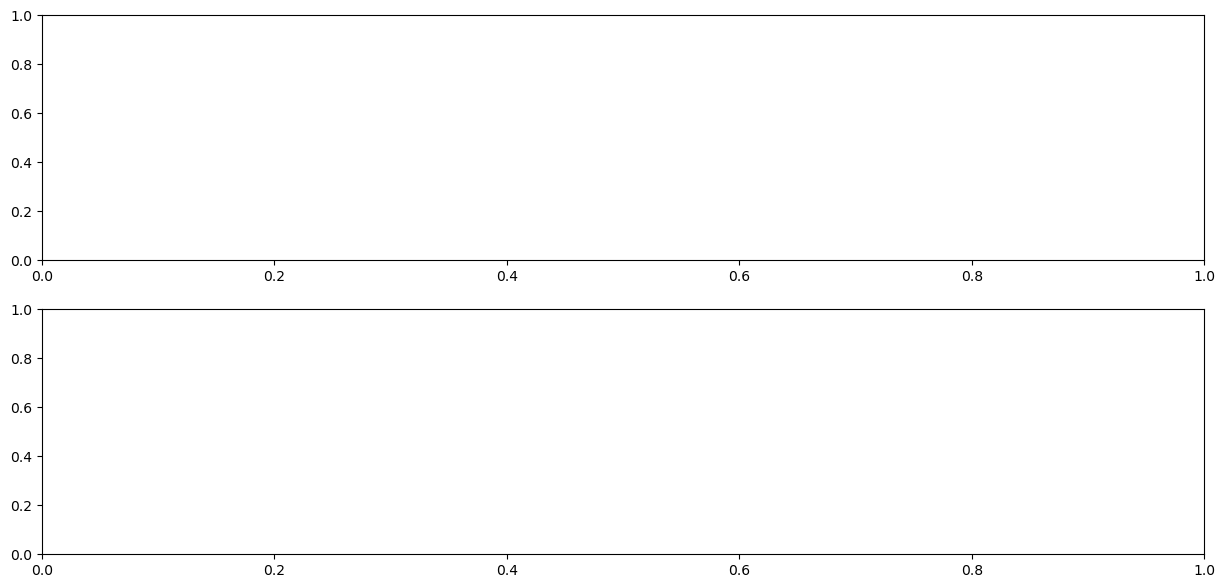

In [35]:
from pyFTS.benchmarks import Util as bUtil

df1 = bUtil.get_dataframe_from_bd("benchmarks.db",
                                  "tag = 'chen_partitioning' and measure = 'rmse'and transformation is null")

df2 = bUtil.get_dataframe_from_bd("benchmarks.db",
                                  "tag = 'chen_partitioning' and measure = 'rmse' and transformation is not null")

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[15,7])

#g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df1, showfliers=False, ax=ax[0], 
#                 palette="Set3")
#box = g1.get_position()
#g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
#g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
#ax[0].set_title("Original data")
#ax[0].set_ylabel("RMSE")
#ax[0].set_xlabel("")

#g2 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df2, showfliers=False, ax=ax[1], 
#                palette="Set3")
#box = g2.get_position()
#g2.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
#g2.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
#ax[1].set_title("Differentiated data")
#ax[1].set_ylabel("RMSE")
#ax[1].set_xlabel("Number of partitions of the UoD")

In [36]:

    model1 = ismailefendi.ImprovedWeightedFTS(partitioner=partitioners[dataset])
    model1.name=dataset.PRICE
    model1.fit(dataset[:train_split], save_model=True, file_path='model1'+dataset, order=1)

    print(model1)

NameError: name 'ismailefendi' is not defined